# In this notebook we visualize effects of different parameters in creating flat maps

In [3]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import akita_utils.format_io as format_io

# sns.set_theme()

# Importing scores from simulations

In [2]:
h5_dirs = "/home1/kamulege/akita_utils/bin/background_seq_experiments/data/shuffled_seqs_scores/*/*.h5" 
dfs = []
for h5_file in glob.glob(h5_dirs):
    dfs.append(format_io.h5_to_df(h5_file, drop_duplicates_key=None))    
dfs = pd.concat(dfs)
dfs

,CS_h1_m1_t0,CS_h1_m1_t1,CS_h1_m1_t2,CS_h1_m1_t3,CS_h1_m1_t4,CS_h1_m1_t5,GC_content,MPS_h1_m1_t0,MPS_h1_m1_t1,MPS_h1_m1_t2,...,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,ctcf_selection_threshold,locus_specification,mutation_method,out_folder,shuffle_parameter
0,16.203125,55.625000,-128.375000,77.125000,20.296875,25.468750,0.367221,0.773926,0.486572,0.277100,...,100.625000,25.609375,34.218750,91.562500,108.06250,4,"chr2,81074176,82384896",randomise_motif,data,4
1,13.890625,124.750000,4.230469,32.750000,3.080078,37.562500,0.367221,0.192627,0.139526,0.197998,...,20.703125,32.781250,39.437500,26.671875,28.62500,8,"chr2,81074176,82384896",permute_whole_seq,data,4
2,19.796875,28.656250,49.937500,36.625000,52.187500,72.625000,0.367221,1.139648,1.301758,1.218750,...,276.750000,389.250000,543.500000,57.218750,39.43750,8,"chr2,81074176,82384896",randomise_whole_seq,data,4
3,7.480469,10.210938,-17.140625,113.500000,2.246094,-4.175781,0.367221,0.727539,0.547852,0.250244,...,135.000000,35.062500,29.531250,58.906250,46.75000,8,"chr2,81074176,82384896",mask_motif,data,4
4,-1.288086,-15.250000,-0.881836,1.969727,-4.031250,3.218750,0.367221,0.343994,0.288574,0.365234,...,37.968750,45.218750,44.156250,41.687500,39.53125,8,"chr2,81074176,82384896",permute_motif,data,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-21.546875,-63.781250,-17.984375,-13.757812,-31.843750,-17.921875,0.367029,0.326904,0.421387,0.260742,...,43.906250,29.937500,31.765625,33.281250,32.34375,12,"chr1,140787712,142098432",mask_motif,data,4
61,-21.546875,-63.781250,-17.984375,-13.757812,-31.843750,-17.921875,0.367029,0.326904,0.421387,0.260742,...,43.906250,29.937500,31.765625,33.281250,32.34375,12,"chr1,140787712,142098432",permute_motif,data,4
62,-21.546875,-63.781250,-17.984375,-13.757812,-31.843750,-17.921875,0.367029,0.326904,0.421387,0.260742,...,43.906250,29.937500,31.765625,33.281250,32.34375,12,"chr1,140787712,142098432",randomise_motif,data,4
63,9.914062,-25.953125,67.937500,72.250000,57.062500,73.687500,0.367029,0.148926,0.143677,0.211304,...,16.500000,45.312500,45.281250,37.281250,38.40625,4,"chr1,140787712,142098432",permute_whole_seq,data,8


In [3]:
dfs["mean_SCD_score"] = (dfs["SCD_h1_m1_t0"]+dfs["SCD_h1_m1_t1"]+dfs["SCD_h1_m1_t2"]+dfs["SCD_h1_m1_t3"]+dfs["SCD_h1_m1_t4"]+dfs["SCD_h1_m1_t5"])/6
dfs["mean_MSS_score"] = (dfs["MSS_h1_m1_t0"]+dfs["MSS_h1_m1_t1"]+dfs["MSS_h1_m1_t2"]+dfs["MSS_h1_m1_t3"]+dfs["MSS_h1_m1_t4"]+dfs["MSS_h1_m1_t5"])/6
dfs["mean_MPS_score"] = (dfs["MPS_h1_m1_t0"]+dfs["MPS_h1_m1_t1"]+dfs["MPS_h1_m1_t2"]+dfs["MPS_h1_m1_t3"]+dfs["MPS_h1_m1_t4"]+dfs["MPS_h1_m1_t5"])/6
dfs["mean_CS_score"] = (dfs["CS_h1_m1_t0"]+dfs["CS_h1_m1_t1"]+dfs["CS_h1_m1_t2"]+dfs["CS_h1_m1_t3"]+dfs["CS_h1_m1_t4"]+dfs["CS_h1_m1_t5"])/6

# General scores distribution

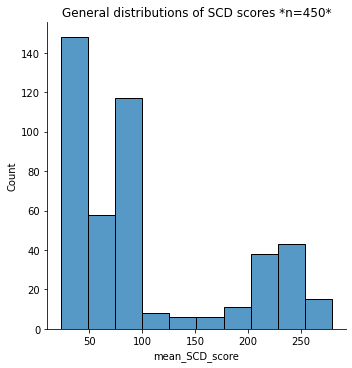

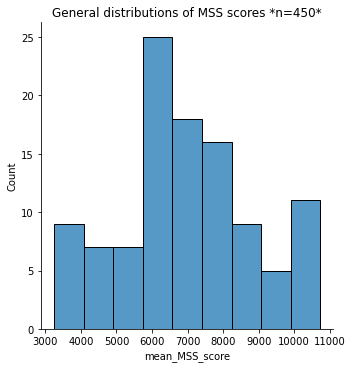

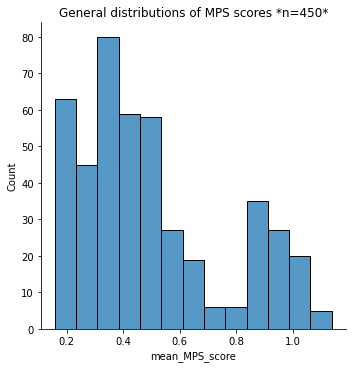

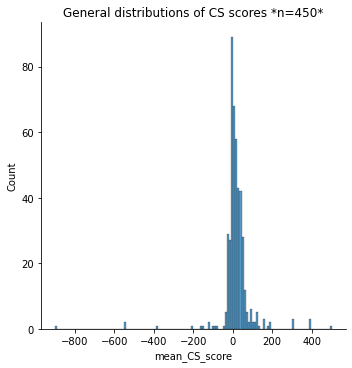

In [8]:
dfs.reset_index(drop=True, inplace=True)
sns.displot(dfs, x="mean_SCD_score")
plt.title(f"General distributions of SCD scores *n={dfs.shape[0]}*")
plt.show()
plt.close()

sns.displot(dfs, x="mean_MSS_score")
plt.title(f"General distributions of MSS scores *n={dfs.shape[0]}*")
plt.show()
plt.close()

sns.displot(dfs, x="mean_MPS_score")
plt.title(f"General distributions of MPS scores *n={dfs.shape[0]}*")
plt.show()
plt.close()

sns.displot(dfs, x="mean_CS_score")
plt.title(f"General distributions of CS scores *n={dfs.shape[0]}*")
plt.show()
plt.close()

# shuffle parameter effect exploration

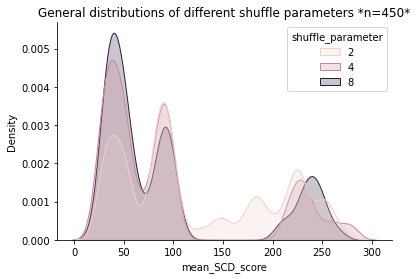

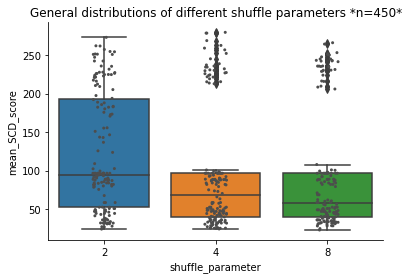

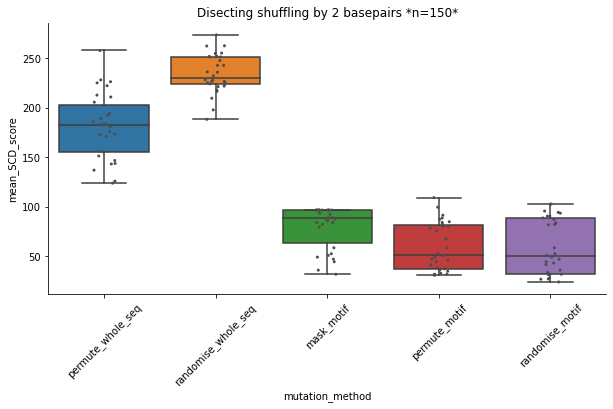

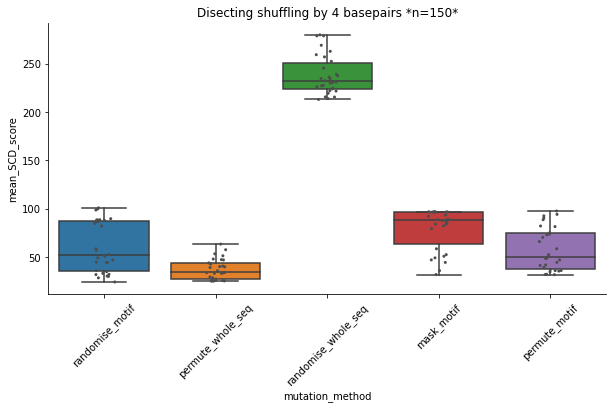

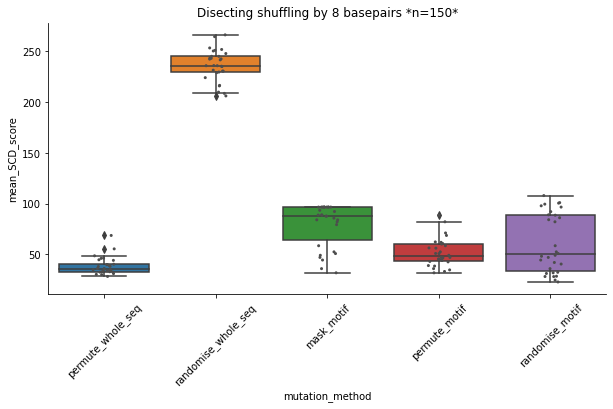

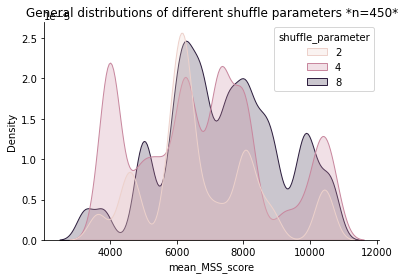

/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


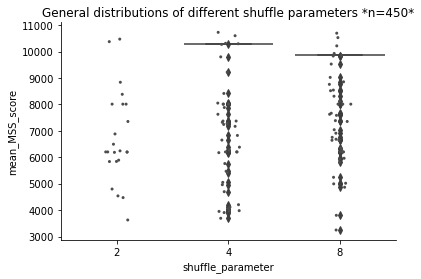

/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


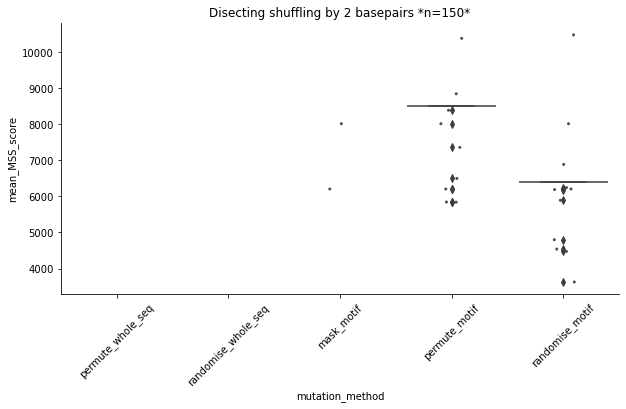

/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


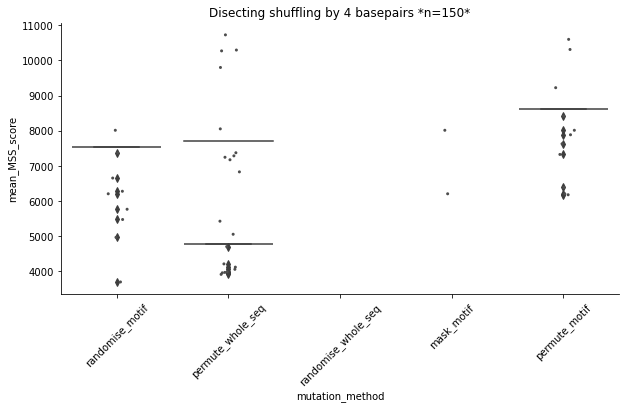

/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


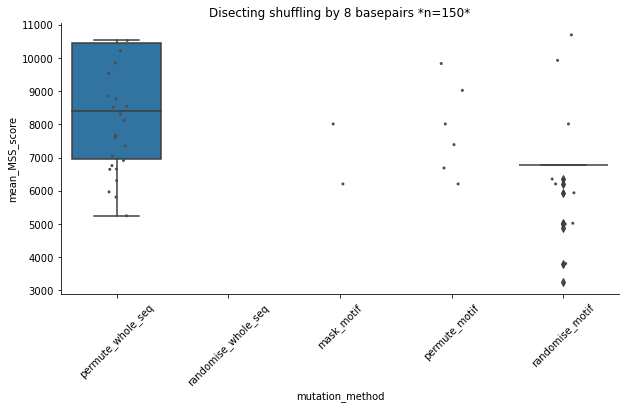

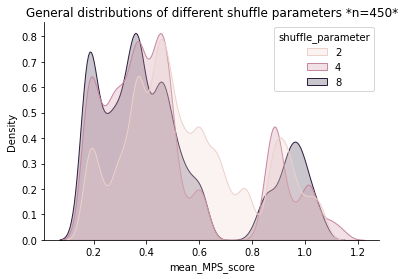

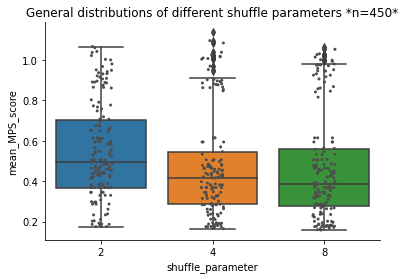

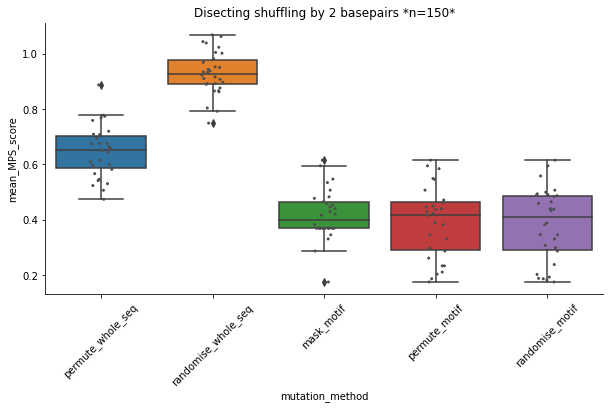

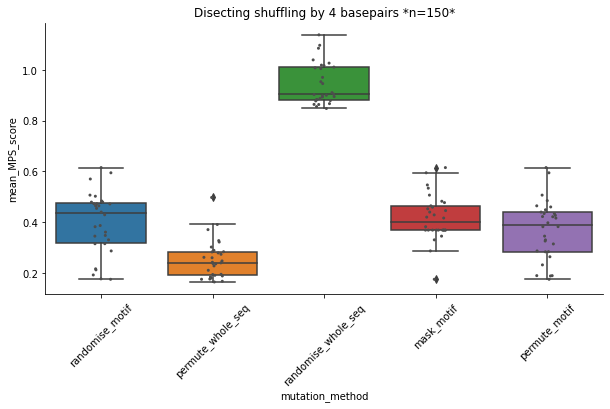

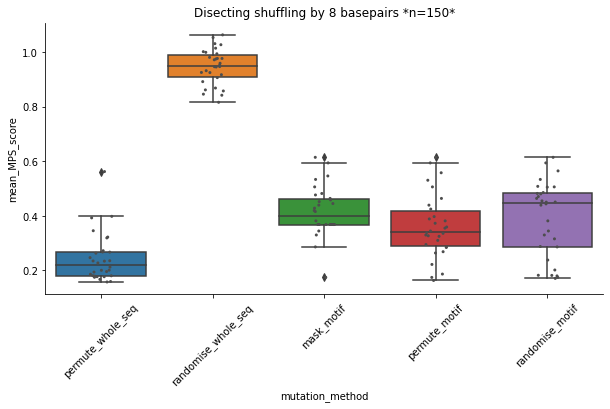

In [5]:
for map_score in ["mean_SCD_score","mean_MSS_score","mean_MPS_score"]: #,"mean_CS_score"
    sns.color_palette("tab10")
    sns.kdeplot(data=dfs, x=map_score, hue="shuffle_parameter", bw_adjust=.3, fill=True)
    plt.title(f"General distributions of different shuffle parameters *n={dfs.shape[0]}*")
    sns.despine(top = True, right = True)
    plt.show()
    sns.boxplot(data=dfs, x='shuffle_parameter', y=map_score)
    sns.stripplot(x="shuffle_parameter", y=map_score, data=dfs, size=3, color=".3", linewidth=0)
    plt.title(f"General distributions of different shuffle parameters *n={dfs.shape[0]}*")
    sns.despine(top = True, right = True)
    plt.show()
    for score in [2,4,8]:
        df_dummy_parameter = dfs.loc[dfs["shuffle_parameter"]==score]
        plt.figure(figsize=(10,5)) # ,dpi=200
        ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y=map_score)
        ax.tick_params(axis='x', labelrotation=45)
        sns.stripplot(x="mutation_method", y=map_score, data=df_dummy_parameter, size=3, color=".3", linewidth=0)
        plt.title(f"Disecting shuffling by {score} basepairs *n={df_dummy_parameter.shape[0]}*")
        sns.despine(top = True, right = True)
        # plt.ylim([-100,100])
        plt.show()
        plt.close()

# map threshold effect exploration

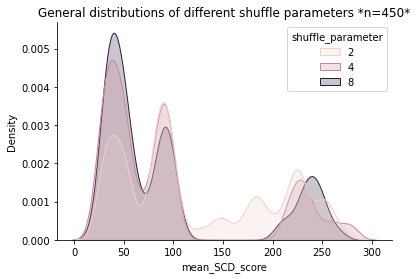

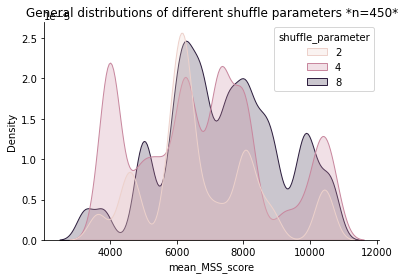

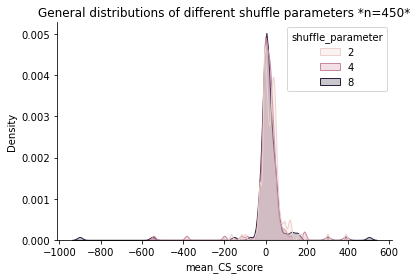

In [6]:
for score in ["mean_SCD_score","mean_MSS_score","mean_CS_score"]:
    sns.kdeplot(data=dfs, x= score, hue="shuffle_parameter", bw_adjust=.3, fill=True)
    plt.title(f"General distributions of different shuffle parameters *n={dfs.shape[0]}*")
    sns.despine(top = True, right = True)
    plt.show()
    plt.close()

    # plt.figure(figsize=(12,5))
    # ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y="mean_SCD_score")
    # ax.tick_params(axis='x', labelrotation=45)
    # sns.stripplot(x="mutation_method", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    # plt.title(f"Disecting {score} as map score threshold *n={df_dummy_parameter.shape[0]}*")
    # sns.despine(top = True, right = True)
    # plt.show()
    # plt.close()

# ctcf selection threshold effect exploration

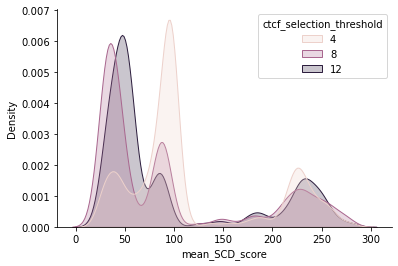

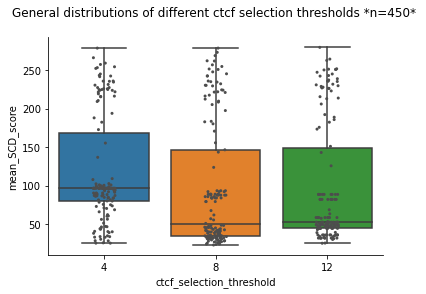

ValueError: min() arg is an empty sequence

<Figure size 720x360 with 0 Axes>

In [7]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="ctcf_selection_threshold", bw_adjust=.3, fill=True)
sns.despine(top = True, right = True)
plt.show()
sns.boxplot(data=dfs, x='ctcf_selection_threshold', y="mean_SCD_score")
sns.stripplot(x="ctcf_selection_threshold", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different ctcf selection thresholds *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for score in [5,8,12]:
    df_dummy_parameter = dfs.loc[dfs["ctcf_selection_threshold"]==score]
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y="mean_SCD_score")
    ax.tick_params(axis='x', labelrotation=45)
    sns.stripplot(x="mutation_method", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} as ctcf selection threshold *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True)
    plt.show()
    plt.close()

# mutation method effect exploration

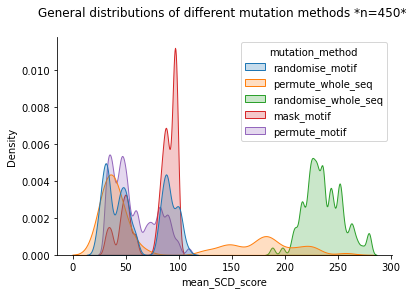

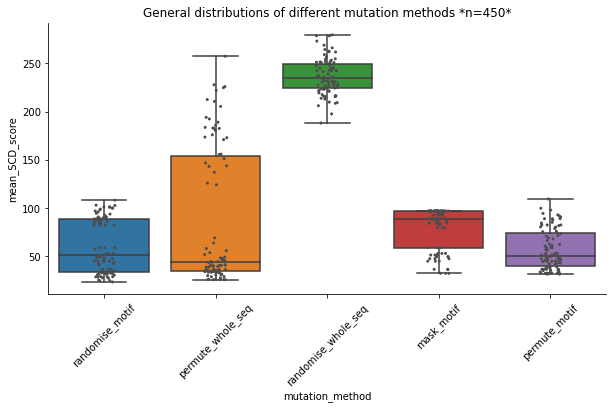

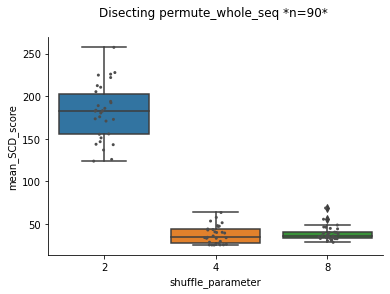

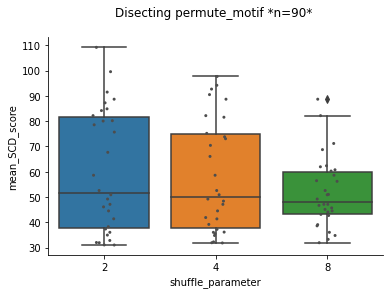

In [9]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="mutation_method", bw_adjust=.3, fill=True)
plt.title(f"General distributions of different mutation methods *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

plt.figure(figsize=(10,5))
ax = sns.boxplot(data=dfs, x='mutation_method', y="mean_SCD_score")
ax.tick_params(axis='x', labelrotation=45)
sns.stripplot(x="mutation_method", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different mutation methods *n={dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()
plt.close()

for score in ['permute_whole_seq','permute_motif']: # ,'mask_motif','randomise_motif','randomise_whole_seq','mask_motif'
    df_dummy_parameter = dfs.loc[dfs["mutation_method"]==score]
    sns.boxplot(data=df_dummy_parameter, x='shuffle_parameter', y="mean_SCD_score")
    sns.stripplot(x="shuffle_parameter", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True)
    plt.show()
    plt.close()

# GC content effect exploration

In [6]:
sns.jointplot(data=dfs, y=f"mean_SCD_score", x = "GC_content") #, hue="shuffle_parameter"

NameError: name 'dfs' is not defined

In [5]:
for score in ['permute_whole_seq','randomise_whole_seq','mask_motif','permute_motif','randomise_motif']:
    df_dummy_parameter = dfs.loc[dfs["mutation_method"]==score]
    sns.jointplot(data=df_dummy_parameter, y=f"mean_SCD_score", x = "GC_content", hue="shuffle_parameter", color=".3")
    plt.title(f"GC distribution for {score} *n={df_dummy_parameter.shape[0]}*\n")

NameError: name 'dfs' is not defined